In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [167]:
# Load the historical weather record
data_source = pd.read_csv("./data.csv", skiprows=2)


In [168]:
# Print the record's head titles
print("Head titles\n", data_source.head())


Head titles
          time  weather_code (wmo code)  temperature_2m_max (°C)  \
0  2001-01-01                      1.0                     33.7   
1  2001-01-02                      1.0                     33.8   
2  2001-01-03                      1.0                     33.2   
3  2001-01-04                      0.0                     34.1   
4  2001-01-05                      0.0                     33.2   

   temperature_2m_min (°C)  rain_sum (mm)  wind_speed_10m_max (km/h)  
0                     21.2            0.0                        8.7  
1                     21.7            0.0                       10.7  
2                     21.3            0.0                       11.6  
3                     21.4            0.0                       12.2  
4                     20.2            0.0                       11.9  


In [169]:
print("Summary statistics\n",data_source.describe())


Summary statistics
        weather_code (wmo code)  temperature_2m_max (°C)  \
count              8437.000000              8437.000000   
mean                 32.029039                31.495674   
std                  28.241906                 3.524021   
min                   0.000000                21.600000   
25%                   1.000000                28.500000   
50%                  51.000000                31.700000   
75%                  61.000000                34.400000   
max                  65.000000                40.600000   

       temperature_2m_min (°C)  rain_sum (mm)  wind_speed_10m_max (km/h)  
count              8437.000000    8437.000000                8437.000000  
mean                 22.347695       3.378037                  10.408166  
std                   1.550862       6.703162                   2.855453  
min                  16.900000       0.000000                   4.100000  
25%                  21.200000       0.000000                   8.300000 

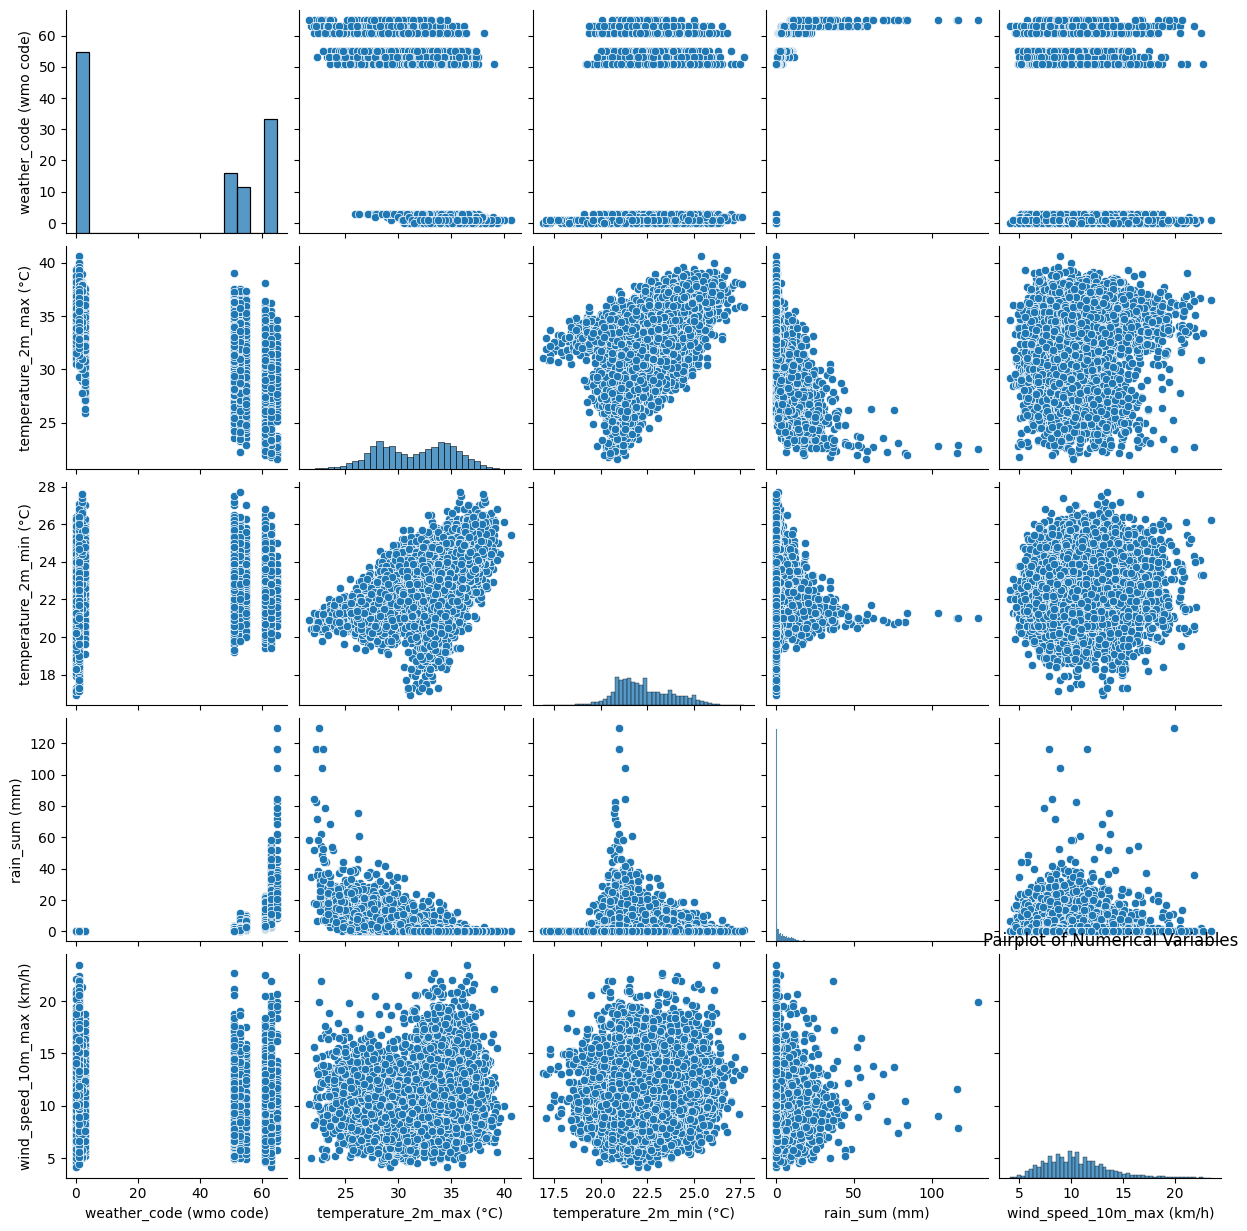

In [170]:
# Data visualization
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data_source)
plt.title('Pairplot of Numerical Variables')
plt.show()


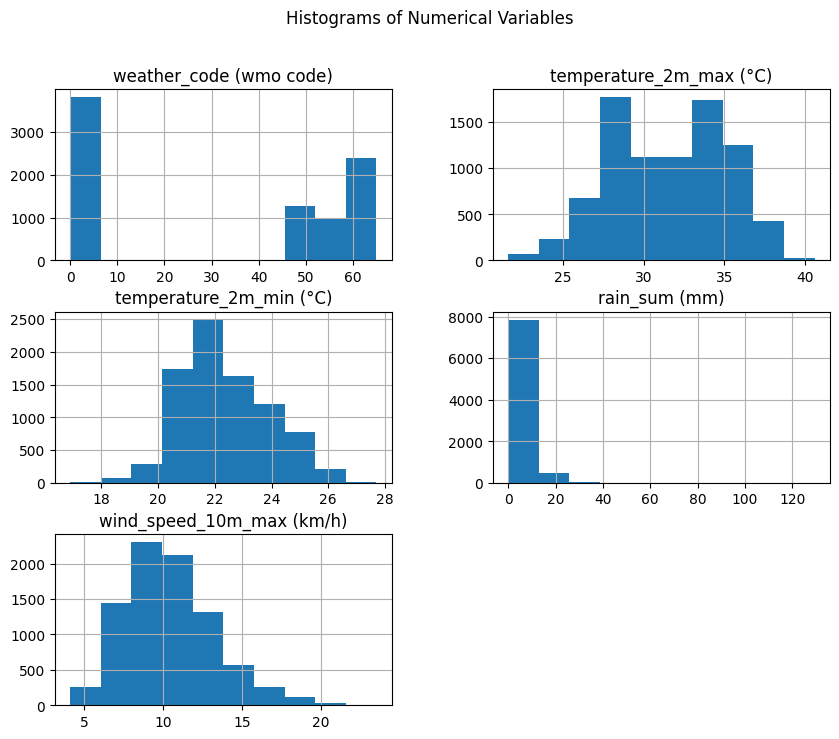

In [171]:
# Histograms for numerical variables
data_source.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Variables')
plt.show()


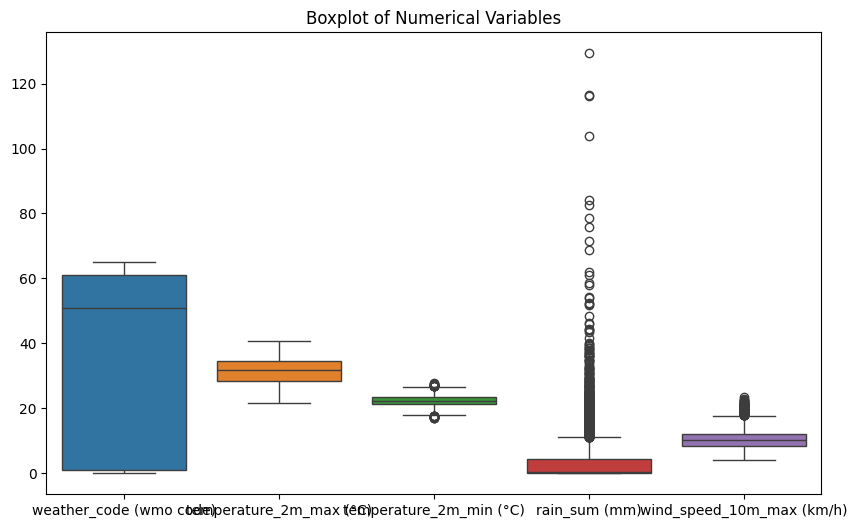

In [172]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_source)
plt.title('Boxplot of Numerical Variables')
plt.show()


In [173]:
# Check for missing values
print("Missing Values")
print(data_source.isnull().sum())


Missing Values
time                         0
weather_code (wmo code)      3
temperature_2m_max (°C)      3
temperature_2m_min (°C)      3
rain_sum (mm)                3
wind_speed_10m_max (km/h)    3
dtype: int64


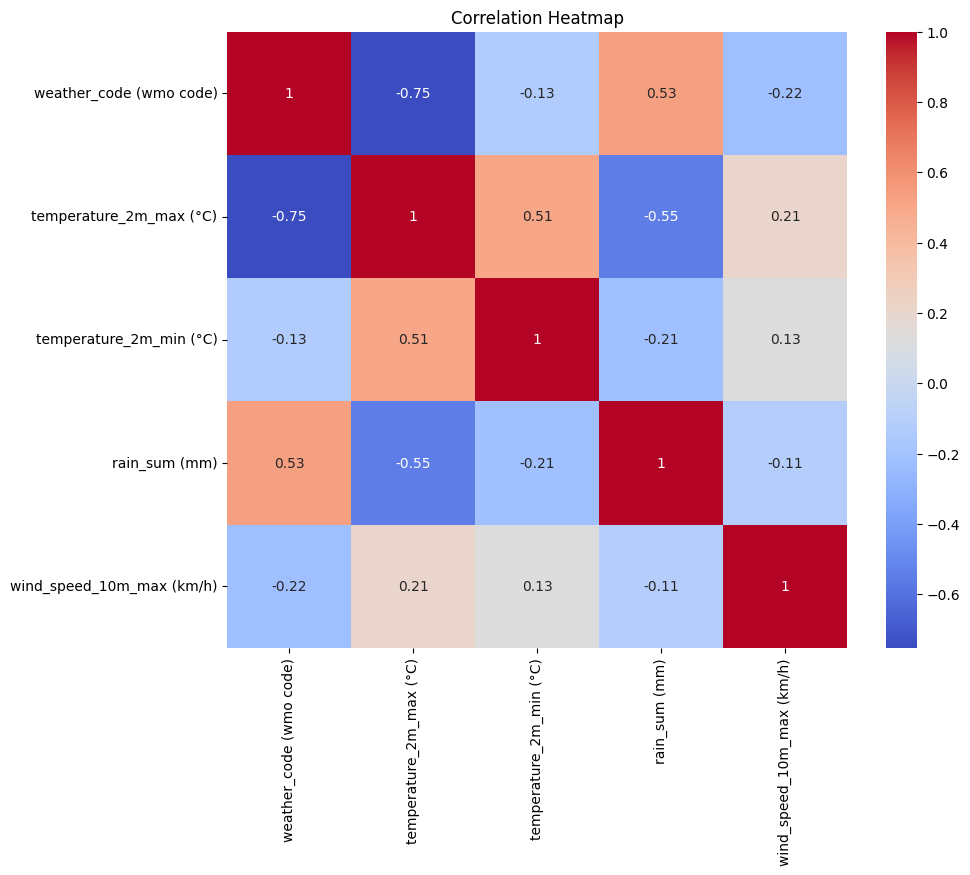

In [174]:
# Select only numeric columns for correlation heatmap
numeric_data = data_source.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [175]:
# Remove rows with missing values
data_source.dropna(inplace=True)


In [176]:
# Convert time column to datetime
data_source["time"] = pd.to_datetime(data_source["time"])


In [177]:
# Calculating daily averages
daily_data = data_source.resample("D", on="time").mean()

In [178]:
# Exclude non-numeric columns before scaling
numeric_columns = data_source.select_dtypes(include=["float64", "int64"]).columns
data_numeric = data_source[numeric_columns]


In [179]:
# Scale the numeric data
data_scaled = preprocessing.scale(data_numeric)


In [180]:
# Separate features (X) and target variable (y)
X = data_source.drop(columns=['temperature_2m_max (°C)', 'time'])  # Exclude non-numeric and target columns
y = data_source['temperature_2m_max (°C)']


In [181]:
# Set the number of days to predict
num_days_to_predict = 30  # Change this value to the desired number of days

# Split the data into training and testing sets
X_test = X[-num_days_to_predict:]
y_test = y[-num_days_to_predict:]
X_train = X[:-num_days_to_predict]
y_train = y[:-num_days_to_predict]


In [182]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [183]:
# Define preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [184]:

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [185]:
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_preprocessed, y_train)


RandomForestRegressor(random_state=42)

In [186]:

# Evaluate the model
y_pred = model.predict(X_test_preprocessed)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.7660955622129632


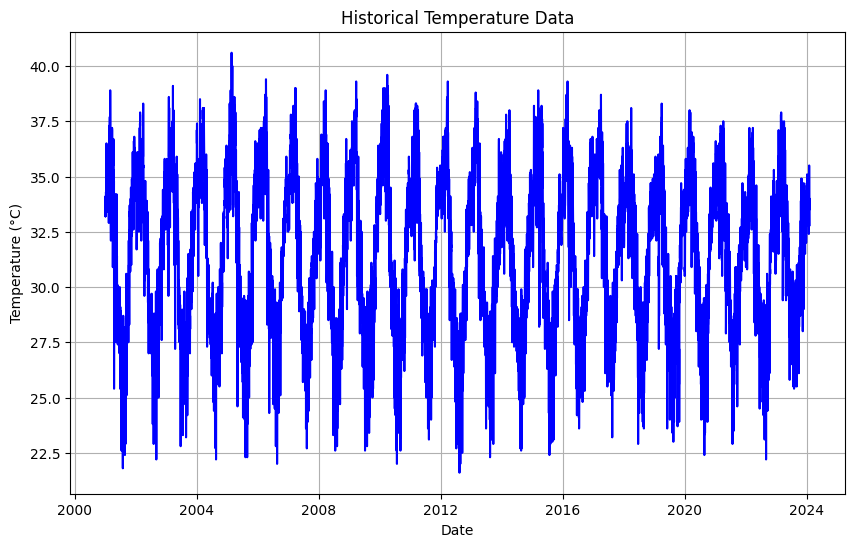

In [187]:
# Plotting historical temperature data
plt.figure(figsize=(10, 6))
plt.plot(data_source['time'], data_source['temperature_2m_max (°C)'], color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Historical Temperature Data')
plt.grid(True)
plt.show()


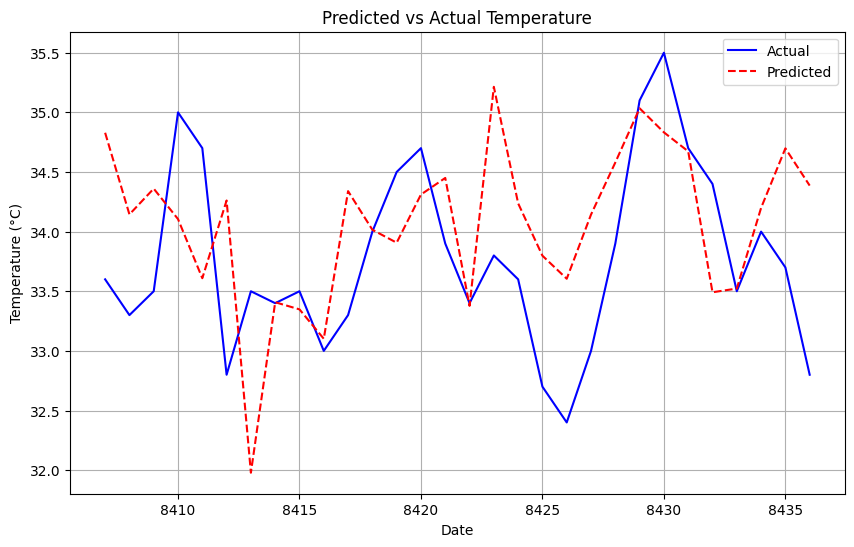

In [188]:
# Plotting predicted temperature data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Predicted vs Actual Temperature')
plt.legend()
plt.grid(True)
plt.show()
